<a href="https://colab.research.google.com/github/Enric-dot/Transformer/blob/main/Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

from enum import Enum

In [ ]:
print(tf.__version__)



2.17.0


In [ ]:
class encodeType(Enum):
  one_hot = '1'

class Embeder:

  def __init__(self, collection):
    self.collection = collection
    self.collection.sort()
    self.collection_length = len(collection)
    self.one_hot_colection = self.encode_collection(encodeType.one_hot)
    self.inputs = np.zeros()
    self.outputs = np.aeros()

  def set_collection(self, collection):
    self.collection = collection.sort()

  def get_collection(self):
    return self.collection

  def encode_collection(self, encode_type: encodeType):
    if encode_type == encodeType.one_hot:
      d = {}
      for element, index in zip(self.collection, range(0,self.collection_length)):
        d[element] = np.zeros(self.collection_length)
        d[element][index] = 1
      return d
    else:
      return None

  def generate_inputs_outputs():
    self.inputs = np.zeros()
    self.outputs = np.aeros()

    return self.inputs, self.outputs

  def get_embbedings(inputs, outputs):
    model = tf.keras.Sequential()
    #model.add(InputLayer(input_shape=(len(words),)))
    model.add(tf.keras.layers.Dense(3, activation="sigmoid", input_shape=(len(words),)))
    model.add(tf.keras.layers.Dense(len(words), activation = "sigmoid"))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    loss=tf.keras.losses.BinaryCrossentropy(),#CategoricalHinge(),
    metrics=['accuracy'])

    model.fit(i,o2, epochs=1000,batch_size = 100)

    print('O: ',len(one_hot),' W: ',len(model.layers[0].weights[0].numpy()))

  def get_embedings(keys,e_weights):
    embeding = {}
    for key,e_w in zip(keys,e_weights):
      embeding[key] = e_w
    return embeding







position encoding

https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def getPositionEncoding(seq_len, d, n=10000):
    P = np.zeros((seq_len, d))
    for k in range(seq_len):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P

P = getPositionEncoding(seq_len=4, d=4, n=100)
print(P)

[[ 0.          1.          0.          1.        ]
 [ 0.84147098  0.54030231  0.09983342  0.99500417]
 [ 0.90929743 -0.41614684  0.19866933  0.98006658]
 [ 0.14112001 -0.9899925   0.29552021  0.95533649]]


[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00 ...  1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 8.41470985e-01  5.40302306e-01  8.21856190e-01 ...  9.99999994e-01
   1.03663293e-04  9.99999995e-01]
 [ 9.09297427e-01 -4.16146837e-01  9.36414739e-01 ...  9.99999977e-01
   2.07326584e-04  9.99999979e-01]
 ...
 [ 3.79607739e-01 -9.25147537e-01 -6.25367561e-01 ...  9.99945674e-01
   1.00551700e-02  9.99949446e-01]
 [-5.73381872e-01 -8.19288245e-01  2.85050529e-01 ...  9.99944548e-01
   1.01588280e-02  9.99948398e-01]
 [-9.99206834e-01  3.98208804e-02  9.50151288e-01 ...  9.99943410e-01
   1.02624858e-02  9.99947339e-01]]
(100, 512)


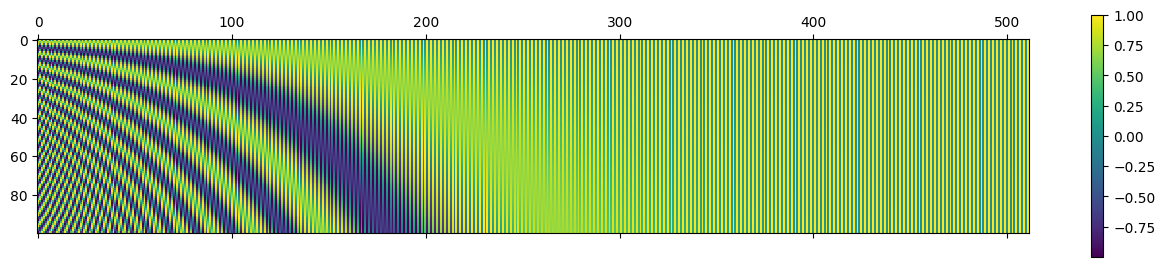

In [12]:

P = getPositionEncoding(seq_len=100, d=512, n=10000)
print(P)
print(P.shape)
cax = plt.matshow(P)
plt.gcf().colorbar(cax)

In [14]:
random_embedings = np.random.random((100,512))

In [16]:
print(random_embedings.shape)

(100, 512)


In [18]:
r2 = random_embedings

In [24]:
min = np.min(r2)
r2 -= min
max = np.max(r2)
r2 /= max
print(np.max(r2))

1.0


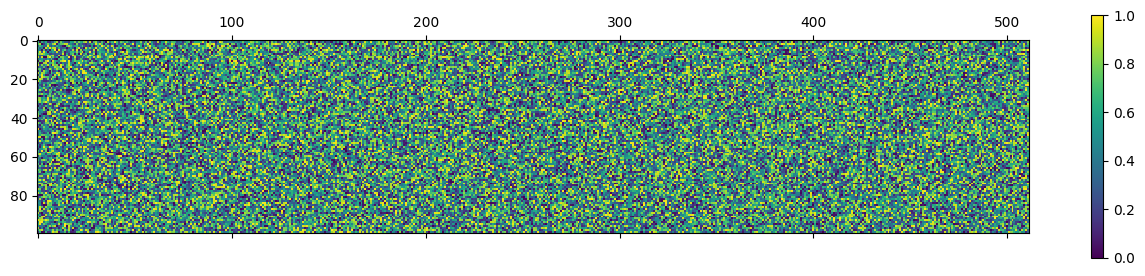

In [25]:
cbx = plt.matshow(r2)
plt.gcf().colorbar(cbx)

In [17]:
embedings_result= P+random_embedings
print(embedings_result)

[[ 0.11540754  1.67381715  0.26858534 ...  1.83132912  0.17309896
   1.25978111]
 [ 1.49474854  0.58097235  1.47738841 ...  1.21183538  0.29490592
   1.81320407]
 [ 1.63962199  0.45182301  0.94577448 ...  1.92830051  0.15118457
   1.7097432 ]
 ...
 [ 1.23574184 -0.7987113  -0.13959637 ...  1.59170768  0.39260927
   1.73951264]
 [-0.06743129  0.00203882  1.19680319 ...  1.62680664  0.95583893
   1.26649291]
 [-0.85879177  0.69002836  0.95922825 ...  1.52205241  0.09764061
   1.31684566]]


In [ ]:
c = ["car","people", "bike", "motorCycle"]
e = Embeder(c)
print(e.one_hot_colection)

range(0, 4)
['bike', 'car', 'motorCycle', 'people']
{'bike': array([1., 0., 0., 0.]), 'car': array([0., 1., 0., 0.]), 'motorCycle': array([0., 0., 1., 0.]), 'people': array([0., 0., 0., 1.])}


ATENTION BLOCK https://medium.com/@gginis/the-attention-mechanism-in-deep-learning-an-example-fb6b27c30cff#:~:text=The%20matrix%20dimensions%20are%204x3%2C%20where%20the%20number,of%20columns%20is%20equal%20to%20the%20embedding%20dimension.

https://www.tensorflow.org/text/tutorials/transformer?hl=es-419#attention_plots

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads):
    super(MultiHeadAttention, self).__init__()
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.wq = tf.keras.layers.Dense(d_model)
    self.wk = tf.keras.layers.Dense(d_model)
    self.wv = tf.keras.layers.Dense(d_model)

    self.dense = tf.keras.layers.Dense(d_model)

  def split_heads(self, x, batch_size):
    """Split the last dimension into (num_heads, depth).
    Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
    """
    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(x, perm=[0, 2, 1, 3])

  def call(self, v, k, q, mask):
    batch_size = tf.shape(q)[0]

    q = self.wq(q)  # (batch_size, seq_len, d_model)
    k = self.wk(k)  # (batch_size, seq_len, d_model)
    v = self.wv(v)  # (batch_size, seq_len, d_model)

    q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
    k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
    v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)

    # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
    # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
    scaled_attention, attention_weights = scaled_dot_product_attention(
        q, k, v, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)

    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

    output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)

    return output, attention_weights